## Homework

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.


### Dataset

In this homework, we will use the Students Performance in 2024 JAMB dataset from [Kaggle](https://www.kaggle.com/datasets/idowuadamo/students-performance-in-2024-jamb).

Here's a wget-able [link](https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv):

```bash
wget https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv
```

The goal of this homework is to create a regression model for predicting the performance of students on a standardized test (column `'JAMB_Score'`).


### Preparing the dataset 

First, let's make the names lowercase:

```python
df.columns = df.columns.str.lower().str.replace(' ', '_')
```

Preparation:

* Remove the `student_id` column.
* Fill missing values with zeros.
* Do train/validation/test split with 60%/20%/20% distribution. 
* Use the `train_test_split` function and set the `random_state` parameter to 1.
* Use `DictVectorizer(sparse=True)` to turn the dataframes into matrices.


## Question 1

Let's train a decision tree regressor to predict the `jamb_score` variable. 

* Train a model with `max_depth=1`.


Which feature is used for splitting the data?

* `study_hours_per_week`
* `attendance_rate`
* `teacher_quality`
* `distance_to_school`


In [1]:
#! wget https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv

In [2]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeRegressor

In [3]:
df = pd.read_csv("jamb_exam_results.csv")

In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   jamb_score                    5000 non-null   int64  
 1   study_hours_per_week          5000 non-null   int64  
 2   attendance_rate               5000 non-null   int64  
 3   teacher_quality               5000 non-null   int64  
 4   distance_to_school            5000 non-null   float64
 5   school_type                   5000 non-null   object 
 6   school_location               5000 non-null   object 
 7   extra_tutorials               5000 non-null   object 
 8   access_to_learning_materials  5000 non-null   object 
 9   parent_involvement            5000 non-null   object 
 10  it_knowledge                  5000 non-null   object 
 11  student_id                    5000 non-null   int64  
 12  age                           5000 non-null   int64  
 13  gen

In [6]:
df.describe()

,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,student_id,age,assignments_completed
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,174.074600,19.521200,84.235200,2.521400,10.005460,2500.500000,18.445800,1.804600
std,47.616477,9.634569,9.485688,0.985564,4.820221,1443.520003,2.301504,0.992076
min,100.000000,0.000000,50.000000,1.000000,0.000000,1.000000,15.000000,1.000000
25%,135.000000,13.000000,78.000000,2.000000,6.600000,1250.750000,16.000000,1.000000
50%,170.000000,19.000000,84.000000,2.000000,10.000000,2500.500000,18.000000,1.000000
75%,209.000000,26.000000,91.000000,3.000000,13.400000,3750.250000,20.000000,2.000000
max,367.000000,40.000000,100.000000,5.000000,20.000000,5000.000000,22.000000,5.000000


In [7]:
df = df.drop("student_id", axis=1).fillna(0)

In [8]:
# train test split
seed = 1
y_name = "jamb_score"
X = df.drop(y_name, axis = 1)
y = df[y_name]

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=1)


In [9]:
# use dv
dv = DictVectorizer(sparse=True)
X_dict = X_train.to_dict(orient="records")
X_train = dv.fit_transform(X_dict)

In [10]:
X_val = dv.transform(X_val.to_dict(orient="records"))

In [11]:
X_test = dv.transform(X_test.to_dict(orient="records"))#

In [12]:
# train tree with max_depth = 1
stump = DecisionTreeRegressor(max_depth=1)
stump.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [13]:
dir(stump)
stump.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 1,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [14]:
stump.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [15]:
# find out which feature was chosen
idx = stump.feature_importances_==1

In [16]:
# get feature name
dv.get_feature_names_out()[idx]

array(['study_hours_per_week'], dtype=object)

## Question 2

Train a random forest model with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1` (optional - to make training faster)


What's the RMSE of this model on validation?

* 22.13
* 42.13
* 62.13
* 82.12


In [17]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [18]:
y_pred = rf.predict(X_val)

In [19]:
from sklearn.metrics import root_mean_squared_error
round(root_mean_squared_error(y_val, y_pred), 3)

np.float64(42.137)

## Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10.
* Set `random_state` to `1`.
* Evaluate the model on the validation dataset.


After which value of `n_estimators` does RMSE stop improving?
Consider 3 decimal places for calculating the answer.

- 10
- 25
- 80
- 200


In [20]:
rmses = {}

for n in range(10,201,10):
    print("building %s estimators" %n)
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    rmses[n]=round(root_mean_squared_error(y_val, y_pred), 3)
    

building 10 estimators
building 20 estimators
building 30 estimators
building 40 estimators
building 50 estimators
building 60 estimators
building 70 estimators
building 80 estimators
building 90 estimators
building 100 estimators
building 110 estimators
building 120 estimators
building 130 estimators
building 140 estimators
building 150 estimators
building 160 estimators
building 170 estimators
building 180 estimators
building 190 estimators
building 200 estimators


<Axes: >

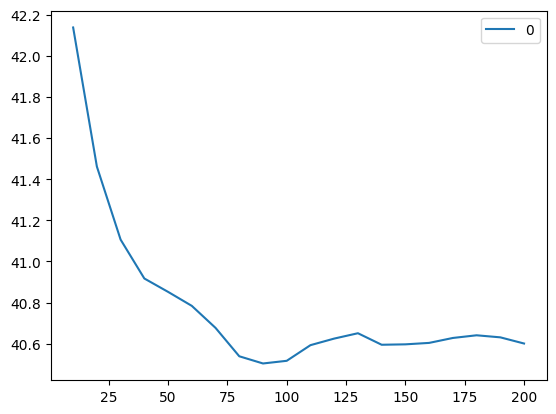

In [21]:
import pandas as pd
pd.DataFrame.from_dict(rmses, orient="index").plot()

## Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values,
  * try different values of `n_estimators` from 10 till 200 (with step 10)
  * calculate the mean RMSE 
* Fix the random seed: `random_state=1`



What's the best `max_depth`, using the mean RMSE?

* 10
* 15
* 20
* 25



In [22]:
rmses = {} #make list of tuples

for m in [10, 15, 20, 25]:
    print("building all estimators for %s depth" %m)
    rmses[m] = {}
    for n in range(10,201,10):
        print('... %s trees' %n)
        rf = RandomForestRegressor(n_estimators=n, max_depth=m, random_state=1, n_jobs=-1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        rmses[m][n]=round(root_mean_squared_error(y_val, y_pred), 3)
    

building all estimators for 10 depth
... 10 trees
... 20 trees
... 30 trees
... 40 trees
... 50 trees
... 60 trees
... 70 trees
... 80 trees
... 90 trees
... 100 trees
... 110 trees
... 120 trees
... 130 trees
... 140 trees
... 150 trees
... 160 trees
... 170 trees
... 180 trees
... 190 trees
... 200 trees
building all estimators for 15 depth
... 10 trees
... 20 trees
... 30 trees
... 40 trees
... 50 trees
... 60 trees
... 70 trees
... 80 trees
... 90 trees
... 100 trees
... 110 trees
... 120 trees
... 130 trees
... 140 trees
... 150 trees
... 160 trees
... 170 trees
... 180 trees
... 190 trees
... 200 trees
building all estimators for 20 depth
... 10 trees
... 20 trees
... 30 trees
... 40 trees
... 50 trees
... 60 trees
... 70 trees
... 80 trees
... 90 trees
... 100 trees
... 110 trees
... 120 trees
... 130 trees
... 140 trees
... 150 trees
... 160 trees
... 170 trees
... 180 trees
... 190 trees
... 200 trees
building all estimators for 25 depth
... 10 trees
... 20 trees
... 30 trees


In [23]:
pd.DataFrame.from_dict(rmses, orient="index").mean(axis = 1).idxmin() #its not auroc, its rmse! be more attentive!

np.int64(10)

# Question 5

We can extract feature importance information from tree-based models. 

At each step of the decision tree learning algorithm, it finds the best split. 
When doing it, we can calculate "gain" - the reduction in impurity before and after the split. 
This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the
[`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.feature_importances_)
field. 

For this homework question, we'll find the most important feature:

* Train the model with these parameters:
  * `n_estimators=10`,
  * `max_depth=20`,
  * `random_state=1`,
  * `n_jobs=-1` (optional)
* Get the feature importance information from this model


What's the most important feature (among these 4)? 

* `study_hours_per_week`
* `attendance_rate`
* `distance_to_school`
* `teacher_quality`



In [24]:
rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [25]:
myfeatures = ["study_hours_per_week"
,"attendance_rate"
,"distance_to_school"
,"teacher_quality"]

In [26]:
(pd.DataFrame([dv.feature_names_,rf.feature_importances_])
 .T
 .rename(columns={0:'feature', 1:'importance'})
 .sort_values(by=['importance'])
 #.pipe(lambda df:df[df.feature.isin(myfeatures)])
 .query('feature in @myfeatures')
 )

,feature,importance
28,teacher_quality,0.082682
5,distance_to_school,0.136486
4,attendance_rate,0.149729
27,study_hours_per_week,0.248354


## Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter:

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

Now change `eta` from `0.3` to `0.1`.

Which eta leads to the best RMSE score on the validation dataset?

* 0.3
* 0.1
* Both give equal value

## Submit the results

* Submit your results here: https://courses.datatalks.club/ml-zoomcamp-2024/homework/hw06
* If your answer doesn't match options exactly, select the closest one


Code from lecture

In [27]:
import xgboost as xgb

In [28]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=dv.feature_names_)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=dv.feature_names_)

In [29]:

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

Just testing that model works

In [30]:
model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [31]:
y_pred = model.predict(dval)
y_pred[:10]

array([182.62964, 137.13918, 153.34145, 133.66042, 226.34402, 220.92033,
       197.31204, 237.12381, 148.88649, 187.3042 ], dtype=float32)

Training for real with watchlist

Code form lecture to capture cell output

In [32]:
def parse_xgb_output(output):
    tree = []
    aucs_train = []
    aucs_val = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        tree.append(it)
        aucs_train.append(train)
        aucs_val.append(val)

    return tree, aucs_train, aucs_val

In [33]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [34]:
model = xgb.train(xgb_params, dtrain,
                  num_boost_round=100,
                  evals=watchlist, verbose_eval=10)

[0]	train-rmse:42.69384	val-rmse:44.89114
[10]	train-rmse:31.63404	val-rmse:40.48319
[20]	train-rmse:27.49658	val-rmse:41.27921
[30]	train-rmse:24.21076	val-rmse:41.72928
[40]	train-rmse:21.35340	val-rmse:42.24363
[50]	train-rmse:19.25157	val-rmse:42.43824
[60]	train-rmse:17.12178	val-rmse:42.64446
[70]	train-rmse:15.78314	val-rmse:42.84909
[80]	train-rmse:13.96907	val-rmse:43.08250
[90]	train-rmse:12.46485	val-rmse:43.25161
[99]	train-rmse:11.39140	val-rmse:43.41882


Changing eta

In [35]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=100,
                  evals=watchlist, verbose_eval=10)

In [36]:
tree, _, rmse_val_eta_03 = parse_xgb_output(output)
print(max(zip(rmse_val_eta_03, tree)))

(44.89114, 0)


In [37]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=100,
                  evals=watchlist, verbose_eval=10)

In [38]:
tree, _, rmse_val_eta_01 = parse_xgb_output(output)
print(max(zip(rmse_val_eta_01, tree)))

(47.00533, 0)


plot

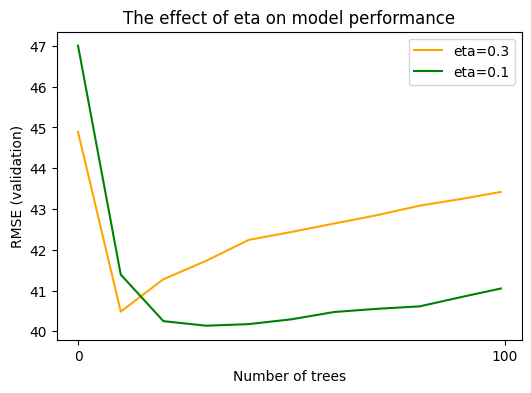

In [39]:
from matplotlib import pyplot as plt
plt.figure(figsize=(6, 4))

plt.plot(tree, rmse_val_eta_03, color='orange', linestyle='solid', label='eta=0.3')
plt.plot(tree, rmse_val_eta_01, color='green', linestyle='solid', label='eta=0.1')
# plt.plot(tree, aucs_val_eta_005, color='grey', linestyle='solid', label='eta=0.05')
# plt.plot(tree, aucs_val_eta_001, color='grey', linestyle='dashed', label='eta=0.01')

plt.xticks(range(0, 101, 100))

plt.legend()

plt.title('The effect of eta on model performance')
plt.xlabel('Number of trees')
plt.ylabel('RMSE (validation)')


plt.show();

0.1 is definitely better (green)